# E5. 나와 닮은 연예인을 찾아보자

## 임베딩(Embedding)은 무엇일까?
사람이 사용하는 언어나 이미지는 0과 1로만 이루어진 컴퓨터 입장에서 그 의미를 파악하기가 어렵다. 
예를 들어 인간의 자연어는 수치화되어 있지 않은 데이터이기 때문에 특징을 추출해 수치화를 해줘야 한다. 이 때 '언어의 벡터화'가 이뤄지고, 이런 일련의 과정을 **Word Embedding**이라고 한다.
가장 기본적으로 사용되는 벡터화의 방법은 **One-hot Encoding**이다. 
* One-hot Encoding
  * 필요한 정보를 담은 하나의 값만 1로 두고, 나머지 값은 0으로 설정하는 방법
  * 대부분의 값이 0을 갖고 단 한개의 1인 값을 가지는 일종의 Sparse Matrix(희소행렬)으로 표현된다.
  * 단어가 많을수록 벡터 공간만 커지는 비효율적인 방법이다. 
  * 원-핫 인코딩은 단어가 무엇인지만을 알려줄 뿐 어떤 특징을 가지고 있는지 설명하지 못한다.

→ 이를 해결하기 위해 Dense Matrix(밀집 행렬)로 변환하는 표현법이 제시되었다. 

![](https://images.velog.io/images/dongho5041/post/c6ca2053-450c-409e-9976-0a208fd9e613/image.png)

즉, 사람이 사용하는 언어나 이미지를 컴퓨터에게 이해시키기 위해서는 어떤 **벡터 공간(Vector Space)에 우리가 표현하고자 하는 정보를 사상(mapping)**해야 한다.

이미지의 경우 두 얼굴이 얼마나 닮았느냐 하는 문제에서 일반적으로 표현된 RGB 데이터를 비교하면 동일한 이미지라도 모든 pixel이 한쪽으로 1 pixel만큼 shift하게 되면 기존과는 매우 다른 이미지가 되므로 컴퓨터가 이미지를 구분할 수 없게 된다.

이 때, **얼굴을 표현하는 고차원의 이미지 정보를 저차원으로 변환하면서 필요한 정보를 보존하는 것**을 **임베딩(Embedding)** 이라고 한다. 이런 임베딩을 통해 컴퓨터는 이미지 데이터에 대한 저차원의 임베딩 벡터를 통해 얼굴을 비교할 수 있는 것이다.

### 이미지 임베딩
이미지의 경우 텍스트와 달리 이미지 데이터가 그 자체로 밀집행렬(Dense Matrix)라고 볼 수 있다. 
하지만 이런 고차원, 고밀도의 데이터를 일일이 비교해가며 비슷한 이미지를 찾는다는 것은 매우 비효율적이다.
그러므로 **이미지의 저차원적 특성 벡터를 추출해 이미지에 포함된 내용이 무엇인지 나타내는 일정한 지표를 얻어 효과적으로 비교한다.**
![](https://images.velog.io/images/dongho5041/post/d66d327e-0a04-4bc2-b80c-144e844bb0e9/image.png)


## 1. 필요한 모듈 가져오기

In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import numpy as np

## 2. 연예인 사진 크롤링

내 사진을 포함한 연예인 사진을 모은다.



사용할 이미지 파일 갯수는 63개 입니다.
file_list: ['이연희1.jpg', '유태오.jpg', '전혜빈.jpg', '설리.jpg', '지상렬.jpg', '정해인.jpg', '류준열.jpg', '조정석.jpg', '이승윤.jpg', '지코.jpg', '이예림1.jpg', '지민.jpg', '수지.jpg', '김구라.jpg', '장동건.jpg', '소지섭.jpg', '김민교.jpg', '신동엽.jpg', '이연희.jpg', '쯔위.jpg', '홍종현.jpg', '장동윤.jpg', '황동호4.jpg', '성소.jpg', '최강창민.jpg', '데프콘.jpg', '정용화.jpg', '강동원.jpg', '전진.jpg', '조진웅.jpg', '마동석.jpg', '고경표.jpg', '공유.jpg', '박서준.jpg', '윤균상.jpg', '전소민.jpg', '아이린.jpg', '류승범.jpg', '이예림2.jpg', '박보검.jpg', '예린.jpg', '정우성.jpg', '이석훈.jpg', '예리.jpg', '황동호5.jpg', '박재범.jpg', '제니.jpg', '선미.jpg', '이예림.jpg', '신우.jpg', '차은우.jpg', '송중기.jpg', '양요섭.jpg', '신성록.jpg', '황동호6.jpg', '박수홍.jpg', '유아인.jpg', '혜리.jpg', '이예림3.jpg', '임시완.jpg', '김수현.jpg', '지효.jpg', '유승호.jpg']


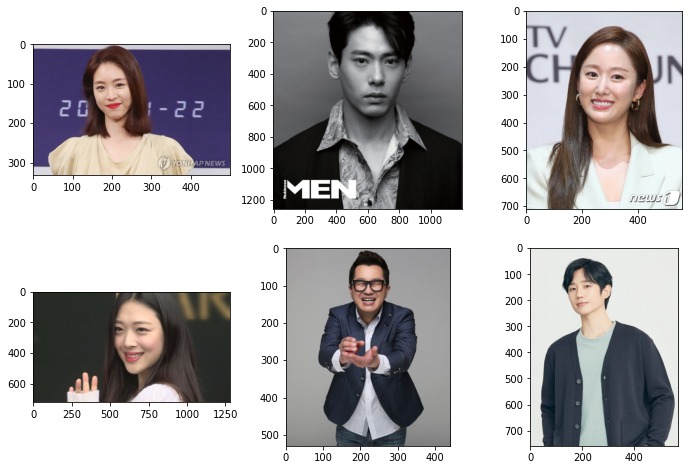

In [26]:
# celeb폴더에 연예인들의 사진과 내 사진을 모은다.
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb'
file_list = os.listdir(dir_path)

print("사용할 이미지 파일 갯수는 {}개 입니다.".format(len(file_list)))
print ("file_list: {}".format(file_list))

# 연예인들의 사진을 확인한다.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 3. 얼굴 영역만 추출하기 위한 get_cropped_face함수

In [27]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

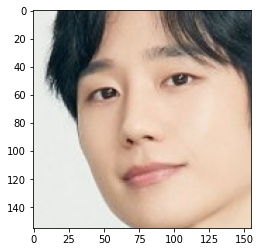

In [28]:
# get_cropped_face 테스트
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb/정해인.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 4. Crop한 얼굴사진을 Embedding Vector로 변환한다.

In [29]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [30]:
get_face_embedding(cropped_face)

[array([-2.29429770e-02,  2.45921612e-02,  5.78806661e-02, -4.83396128e-02,
        -1.16044439e-01,  2.06409730e-02, -1.28352121e-01, -8.22820589e-02,
         1.19852766e-01, -1.32820413e-01,  2.19340548e-01, -2.44265161e-02,
        -1.78799480e-01, -8.19060430e-02, -7.73456991e-02,  2.01408654e-01,
        -1.30649269e-01, -1.82259977e-01, -2.21192203e-02,  3.42386886e-02,
         9.12471935e-02,  3.95433269e-02,  1.52384881e-02,  4.91692685e-03,
        -1.60627633e-01, -3.08289111e-01, -1.21297732e-01, -3.86814624e-02,
        -5.66627793e-02, -9.37856883e-02, -8.00197199e-02,  1.10201454e-02,
        -1.96642652e-01,  1.85860321e-04,  5.61215058e-02,  6.40324801e-02,
        -6.87069595e-02, -7.39614293e-02,  1.86587691e-01,  4.58613001e-02,
        -2.61041075e-01,  1.05255790e-01,  5.20206690e-02,  2.21633345e-01,
         2.05551177e-01, -1.02662640e-02,  3.14208344e-02, -1.82700098e-01,
         1.42578810e-01, -1.67802483e-01,  6.15803078e-02,  2.01549232e-01,
         1.0

## 5. 모든 이미지에 대해 Embedding을 하고, Dict에 저장

In [31]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    image_dict={}
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            image_dict[os.path.splitext(file)[0]]=face
    return embedding_dict, image_dict


dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb'
embedding_dict, image_dict = get_face_embedding_dict(dir_path)
embedding_dict['정해인']

array([-2.29429770e-02,  2.45921612e-02,  5.78806661e-02, -4.83396128e-02,
       -1.16044439e-01,  2.06409730e-02, -1.28352121e-01, -8.22820589e-02,
        1.19852766e-01, -1.32820413e-01,  2.19340548e-01, -2.44265161e-02,
       -1.78799480e-01, -8.19060430e-02, -7.73456991e-02,  2.01408654e-01,
       -1.30649269e-01, -1.82259977e-01, -2.21192203e-02,  3.42386886e-02,
        9.12471935e-02,  3.95433269e-02,  1.52384881e-02,  4.91692685e-03,
       -1.60627633e-01, -3.08289111e-01, -1.21297732e-01, -3.86814624e-02,
       -5.66627793e-02, -9.37856883e-02, -8.00197199e-02,  1.10201454e-02,
       -1.96642652e-01,  1.85860321e-04,  5.61215058e-02,  6.40324801e-02,
       -6.87069595e-02, -7.39614293e-02,  1.86587691e-01,  4.58613001e-02,
       -2.61041075e-01,  1.05255790e-01,  5.20206690e-02,  2.21633345e-01,
        2.05551177e-01, -1.02662640e-02,  3.14208344e-02, -1.82700098e-01,
        1.42578810e-01, -1.67802483e-01,  6.15803078e-02,  2.01549232e-01,
        1.01579100e-01,  

## 6. 얼굴 임베딩 사이의 거리 측정

이미지 벡터를 numpy로 연산하기 위해 numpy array로 변환한다.  
벡터간 거리를 numpy.linalg.norm을 활용해 L2 Norm Distance로 계산한다.  

* **L2 Norm Distance**  

각 차원의 차이를 제곱한 뒤 합한 후 제곱근을 구한 값이다. 2차원 유클리디안 거리를 다차원으로 확장시킨 것
* **Triplet Loss**  
세 개의 데이터 쌍을 이용해 계산하는 손실함수로 네트워크를 학습시킬 수 있다. 유사한 벡터는 가깝게, 다른 벡터는 멀게 학습시켜 동일 인물이나 닮은 사람을 찾아낼 수 있다.


0.40856299060130974


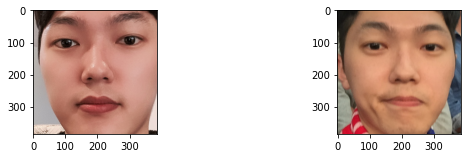

In [32]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('황동호4', '황동호5'))

fig = plt.figure(figsize=(10,5))
fig.add_subplot(2,2,1)
plt.imshow(image_dict['황동호4'])
fig.add_subplot(2,2,2)
plt.imshow(image_dict['황동호5'])

In [66]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('황동호4')

In [67]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))[0][1]

array([-0.16802546,  0.03174239, -0.01268401, -0.07235094, -0.11086001,
       -0.02898553, -0.0414295 , -0.1012454 ,  0.12456696, -0.13327552,
        0.16002962, -0.0919831 , -0.2346538 , -0.05791735, -0.12411278,
        0.21749158, -0.11986326, -0.14551304, -0.02012488, -0.01467317,
        0.13123666,  0.07604118, -0.03730152,  0.07665566, -0.10554558,
       -0.31655252, -0.09653181, -0.02351039, -0.0086365 , -0.09087079,
       -0.06227572,  0.07953561, -0.18611445, -0.01791537,  0.0153113 ,
        0.15411235,  0.00782416, -0.08004056,  0.13792413,  0.03069378,
       -0.26115093,  0.03622771,  0.04210207,  0.29280627,  0.16752386,
        0.00750378, -0.00630512, -0.15820958,  0.07550831, -0.17179602,
       -0.01165878,  0.10993235,  0.00640214,  0.02865031, -0.04253176,
       -0.10167866,  0.03598598,  0.10322507, -0.13826607,  0.00511959,
        0.08700161, -0.13777098, -0.03481008, -0.11001744,  0.18161143,
        0.01734919, -0.11378112, -0.18133655,  0.1654482 , -0.19

## 7. 닮은 연예인 찾기

In [68]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    fig = plt.figure(figsize=(15,5))
    for i in range(top+2):
        if i == 0 :
            continue
        if i == 1 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            a = fig.add_subplot(2,top,i-1)
            plt.imshow(image_dict[sorted_faces[i][0]])
            a.set_title(i-1)


순위 1 : 이름(황동호6), 거리(0.40203058206971737)
순위 2 : 이름(예린), 거리(0.40226349526966343)
순위 3 : 이름(황동호5), 거리(0.40856299060130974)
순위 4 : 이름(이예림1), 거리(0.41401421076261646)
순위 5 : 이름(예리), 거리(0.4250848117803876)


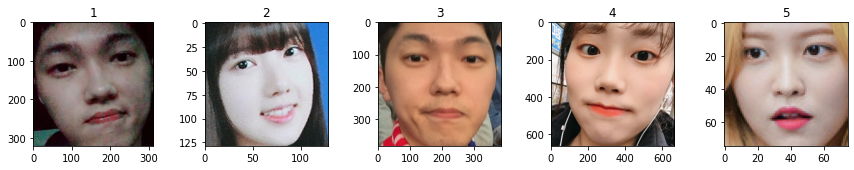

In [69]:
facecc=get_nearest_face('황동호4')

## 7. 정리
* 데이터 수집 및 전처리 : 이미지를 크롤링하고 라벨링하는데 생각보다 많은 시간이 허비되었다. 잘 인식되지 않을 것 같은 이미지는 제외하고 진행했다.

* 얼굴 Crop과 Embedding : Crop까지의 과정은 이해를 했으나, Embedding을 했을 때 그 벡터가 어떤 정보를 가지고 있는지 이해해보려 했으나 별다른 정보를 찾을 수 없었다. 이미지 데이터의 주변 벡터와의 차이로 이뤄진다는 애매한 정보만을 얻을 수 있었다.

* 닮은 연예인 찾기 : 예상한대로 내 사진이 1위와 3위로 높은 순위를 보였다. 나머지 2, 4, 5위를 살펴 봤을 때 성별과는 관계 없이 이목구비 등을 통해 임베딩 벡터가 설정되었다고 생각된다.